In [59]:
import numpy as np
import pandas as pd
import os
from collections import Counter
# used for data visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#used for prediction
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm
from sklearn.metrics import confusion_matrix
cwd = os.getcwd()

In [52]:
# Read data
path = cwd + "/data/SMSSpamCollection"

with open(path) as file:
    data = file.readlines()

data = list(map(lambda line: line.lower().strip().split("\t"),data))
data_df = pd.DataFrame(data,columns=["Tag","Message"])
spam_data_df = data_df[data_df.Tag == "spam"]
ham_data_df = data_df[data_df.Tag == "ham"]
data_df.head()


,Tag,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


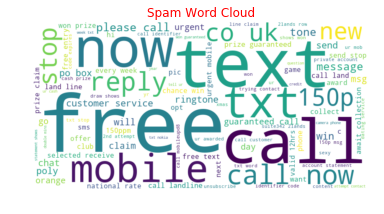

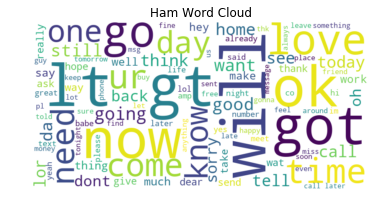

In [53]:
#Plot the Word Cloud for each category
stopwords = set(STOPWORDS)
spam_wc = WordCloud(width=800, 
                    height = 400,
                    stopwords=stopwords,
                    max_words=100, 
                    background_color="white").generate(" ".join(spam_data_df["Message"].tolist()))

ham_wc = WordCloud(width=800, 
                   height = 400,
                   stopwords=stopwords,
                   max_words=100, 
                   background_color="white").generate(" ".join(ham_data_df["Message"].tolist()))

plt.imshow(spam_wc,interpolation='bilinear')
plt.axis("off")
plt.getp(plt.title("Spam Word Cloud"),'text')
plt.setp(plt.title("Spam Word Cloud"),color = 'r')
plt.show()
spam_wc.to_file(cwd+"/img/spam_word_cloud.png")
plt.imshow(ham_wc,interpolation='bilinear')
plt.axis("off")
plt.getp(plt.title("Ham Word Cloud"),'text')
plt.show()
ham_wc.to_file(cwd+"/img/ham_word_cloud.png")

In [54]:
#split data
X_train_data,X_test_data, Y_train_data, Y_test_data =  train_test_split(data_df["Message"], data_df["Tag"], test_size = 0.1)

In [55]:
#convert data
v=DictVectorizer(sparse=False)
train_dictionary= list(map(lambda line:dict(Counter(line)),(list(map(lambda line:line.strip().split(),X_train_data.tolist())))))
train_bag_of_words = v.fit_transform(train_dictionary)

test_dictionary= list(map(lambda line:dict(Counter(line)),(list(map(lambda line:line.strip().split(),X_test_data.tolist())))))
test_bag_of_words = v.transform(test_dictionary)

categories = {"spam":1, "ham":0}
Y_train_data.replace(categories,inplace = True)
Y_test_data.replace(categories,inplace = True)

In [57]:
#Naive bayes
NB_clf = GaussianNB()
NB_clf.fit(train_bag_of_words,Y_train_data.tolist())
Y_NB_pred = NB_clf.predict(test_bag_of_words)
NB_clf.score(test_bag_of_words, Y_test_data)
#print(Y_NB_pred,Y_test_data.tolist())
precision_recall_fscore_support(Y_test_data, Y_NB_pred,labels=[0, 1])

(array([0.97173913, 0.66326531]),
 array([0.93125   , 0.83333333]),
 array([0.95106383, 0.73863636]),
 array([480,  78]))

In [62]:
tn, fp, fn, tp = confusion_matrix(Y_test_data, Y_NB_pred,labels=[0, 1]).ravel()
(tn, fp, fn, tp)

(447, 33, 13, 65)

In [33]:
#SVM
svm_clf = svm.SVC(C=500,gamma="auto")
svm_clf.fit(train_bag_of_words,Y_train_data.tolist())
Y_svm_pred = svm_clf.predict(test_bag_of_words)
precision_recall_fscore_support(Y_test_data, Y_svm_pred,labels=[0, 1])
svm_clf.score(test_bag_of_words,Y_test_data)

0.985663082437276

In [34]:
precision_recall_fscore_support(Y_test_data, Y_svm_pred,labels=[0, 1])

(array([0.98350515, 1.        ]),
 array([1.        , 0.90123457]),
 array([0.99168399, 0.94805195]),
 array([477,  81]))

In [28]:
c=2
while c<=1000:
    svm_clf = svm.SVC(C=c,gamma="auto")
    svm_clf.fit(train_bag_of_words,Y_train_data.tolist())
    Y_svm_pred = svm_clf.predict(test_bag_of_words)
    matrix = precision_recall_fscore_support(Y_test_data, Y_svm_pred,labels=[0, 1])
    score = svm_clf.score(test_bag_of_words,Y_test_data)
    print(str(c) + "\t" + str(matrix) + "\t" + str(score))
    c *= 2

/home/jovyan/spam/SMS-Spam-Filter/spam/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2	(array([0.87275986, 0.        ]), array([1., 0.]), array([0.93205742, 0.        ]), array([487,  71]))	0.8727598566308243


/home/jovyan/spam/SMS-Spam-Filter/spam/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4	(array([0.87275986, 0.        ]), array([1., 0.]), array([0.93205742, 0.        ]), array([487,  71]))	0.8727598566308243


/home/jovyan/spam/SMS-Spam-Filter/spam/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


8	(array([0.87275986, 0.        ]), array([1., 0.]), array([0.93205742, 0.        ]), array([487,  71]))	0.8727598566308243
16	(array([0.89686924, 1.        ]), array([1.        , 0.21126761]), array([0.94563107, 0.34883721]), array([487,  71]))	0.899641577060932
32	(array([0.93653846, 1.        ]), array([1.        , 0.53521127]), array([0.96722939, 0.69724771]), array([487,  71]))	0.9408602150537635
64	(array([0.96055227, 1.        ]), array([1.        , 0.71830986]), array([0.97987928, 0.83606557]), array([487,  71]))	0.96415770609319
128	(array([0.96819085, 1.        ]), array([1.        , 0.77464789]), array([0.98383838, 0.87301587]), array([487,  71]))	0.9713261648745519
256	(array([0.97205589, 1.        ]), array([1.       , 0.8028169]), array([0.98582996, 0.890625  ]), array([487,  71]))	0.974910394265233
512	(array([0.974, 1.   ]), array([1.        , 0.81690141]), array([0.98682877, 0.89922481]), array([487,  71]))	0.9767025089605734
